C:\Users\Nico\AppData\Local\Temp\ipykernel_12604\1669481540.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '') if pd.notnull(x) else x)


Top features que diferencian clusters:
  Features 
slope_mcuentas_saldo_window                    3.858186e+09
slope_mtransferencias_recibidas_window         2.759198e+09
slope_mpayroll_window                          2.370083e+09
slope_mcaja_ahorro_window                      1.990680e+09
slope_TC_Total_mpagospesos_window              1.644634e+09
slope_mtransferencias_emitidas_window          1.074748e+09
slope_mautoservicio_window                     7.800310e+08
slope_mpasivos_margen_window                   4.546653e+07
slope_ctrx_quarter_window                      4.934432e+06
slope_ctarjeta_debito_transacciones_window     3.895565e+05
slope_ccomisiones_otras_window                 2.592708e+05
slope_cextraccion_autoservicio_window          1.246517e+05
mcuentas_saldo_lag_1                           3.816084e+04
mcuentas_saldo                                 3.791278e+04
mpayroll_lag_1                                 2.671401e+04
dtype: float64


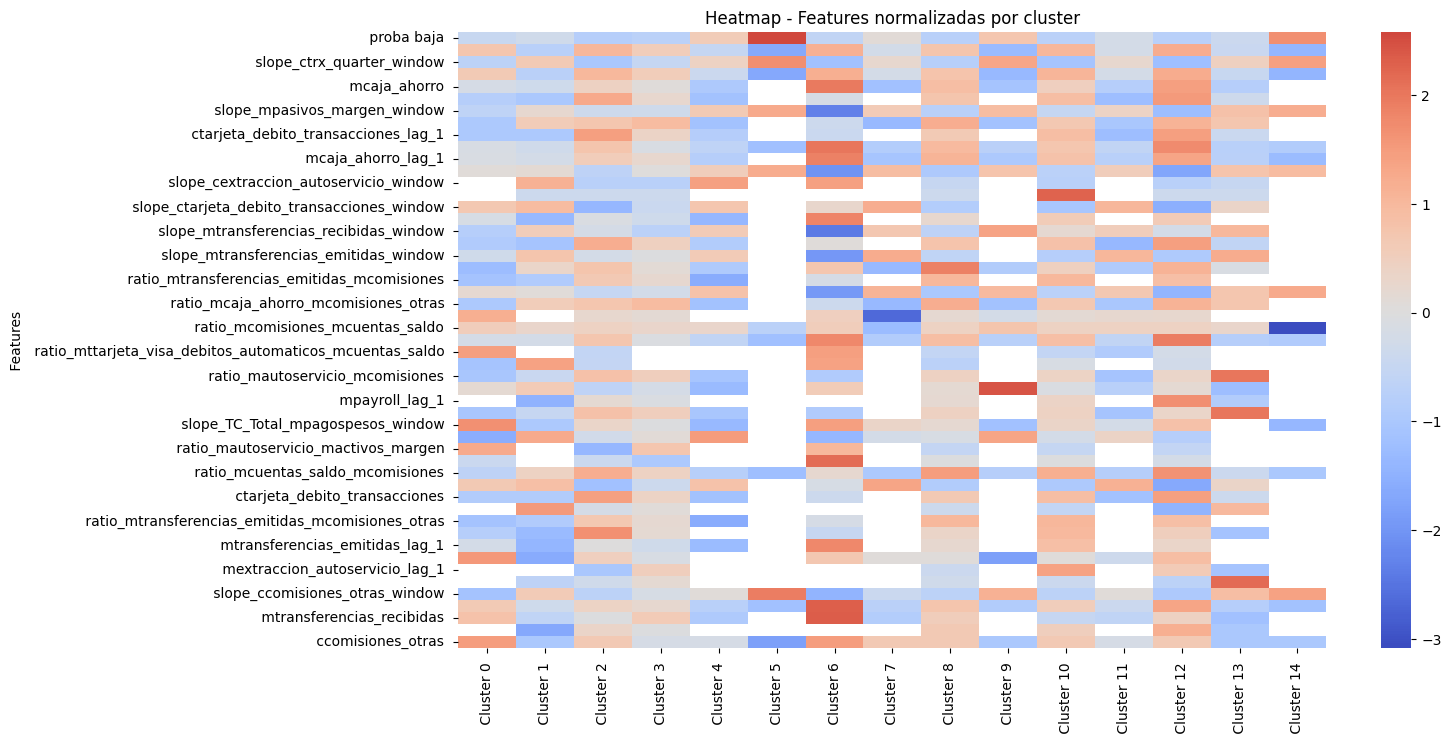

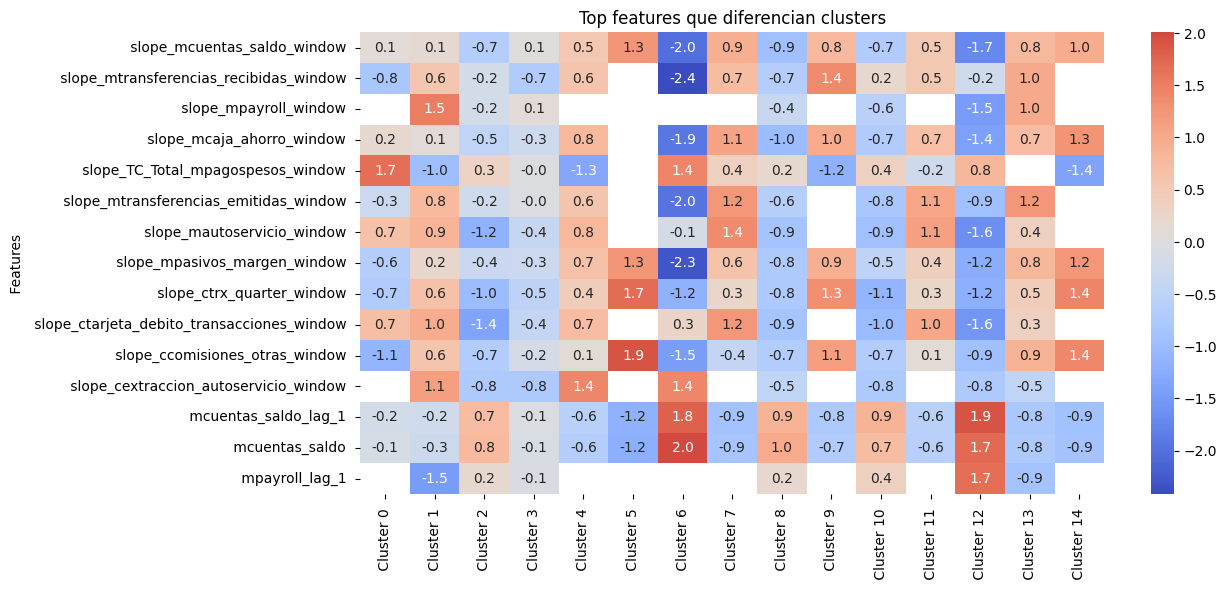

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# 1. Cargar los datos
# ------------------------
# Supongamos que guardaste la tabla como "clusters_medianas.csv"
# con la primera columna = feature, y las siguientes = clusters.
df = pd.read_csv("top_overall_features_by_cluster.csv", index_col=0)

# Limpiar el DataFrame: reemplazar '-' por NaN, quitar comas, convertir a float
df = df.replace('-', np.nan)
df = df.applymap(lambda x: str(x).replace(',', '') if pd.notnull(x) else x)
df = df.apply(pd.to_numeric, errors='coerce')

# df tiene estructura: filas = features, columnas = Cluster 0 ... Cluster N

# ------------------------
# 2. Normalizar por feature (z-score)
# ------------------------
df_norm = df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

# ------------------------
# 3. Calcular "importancia" de cada feature
# ------------------------
# Desviación estándar de la mediana entre clusters
feature_dispersion = df.std(axis=1).sort_values(ascending=False)

# Top 15 features más discriminantes
top_features = feature_dispersion.head(15)
print("Top features que diferencian clusters:\n", top_features)

# ------------------------
# 4. Visualización
# ------------------------

# Heatmap con todas las variables normalizadas
plt.figure(figsize=(14, 8))
sns.heatmap(df_norm, cmap="coolwarm", center=0)
plt.title("Heatmap - Features normalizadas por cluster")
plt.show()

# Heatmap con solo las top features
plt.figure(figsize=(12, 6))
sns.heatmap(df_norm.loc[top_features.index], cmap="coolwarm", center=0, annot=True, fmt=".1f")
plt.title("Top features que diferencian clusters")
plt.show()
